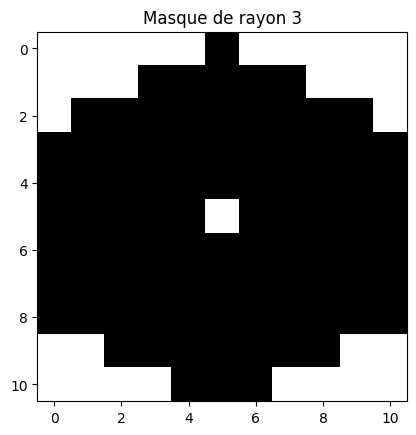

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def generate_hex_mask(radius, center_is_odd_col=True):
    """
    Génère un masque (matrice carrée) pour une grille hexagonale "odd-q" (colonnes décalées).
    
    Args:
        radius (int): La profondeur des voisins (1 = voisins directs, 2 = voisins de voisins...)
        center_is_odd_col (bool): True si le centre du masque est sur une colonne impaire,
                                  False si paire. Le motif 'zigzag' inverse les diagonales.
    """
    size = 2 * radius + 1
    center = radius
    mask = np.zeros((size, size), dtype=int)

    # On parcourt chaque case de la future matrice masque
    for r in range(size):
        for c in range(size):
            # Coordonnées relatives par rapport au centre du masque (0,0 au centre)
            rel_row = r - center
            rel_col = c - center
            
            # --- CONVERSION EN COORDONNEES CUBIQUES (x, z, y) ---
            # Dans le système "odd-q", x correspond aux colonnes (q).
            # La conversion dépend de la parité réelle de la colonne dans la grille globale.
            # On simule ici : si center_is_odd_col est True, on considère que 'c' 
            # s'ajoute à une colonne impaire.
            
            # Calcul de la colonne "absolue" simulée pour gérer le décalage
            absolute_col = 1 if center_is_odd_col else 0
            current_col = absolute_col + rel_col
            
            # Formule de conversion "Odd-Q" vers Cube
            # x = col
            # z = row - (col - (col&1)) / 2
            # y = -x - z
            
            # On convertit le centre (qui est à 0,0 relatif)
            center_x = absolute_col
            center_z = 0 - (absolute_col - (absolute_col & 1)) / 2
            center_y = -center_x - center_z
            
            # On convertit le point courant (r, c relatifs)
            point_x = current_col
            point_z = rel_row - (current_col - (current_col & 1)) / 2
            point_y = -point_x - point_z
            
            # --- CALCUL DE DISTANCE ---
            # La distance sur une grille hex est la moitié de la distance Manhattan 3D
            dist = (abs(center_x - point_x) + 
                    abs(center_y - point_y) + 
                    abs(center_z - point_z)) / 2
            
            if dist <= radius:
                mask[r, c] = 1
    mask[center, center] = 0
    return mask

mask_r3 = generate_hex_mask(5, center_is_odd_col=True)

# Visualisation rapide
plt.imshow(mask_r3, cmap='Greys')
plt.title("Masque de rayon 3")
plt.show()